In [ ]:
# from datasets import load_dataset

# # Login using e.g. `huggingface-cli login` to access this dataset
# ds = load_dataset("lmsys/lmsys-chat-1m")
# ds = ds["train"].shuffle(seed=42).select(range(2000))
# ds.to_csv("../data/lmsys-chat-lm.csv")
# ds.to_json("../data/lmsys-chat-lm.json")

Creating json from Arrow format: 100%|██████████| 2/2 [00:00<00:00, 15.75ba/s]


10345810

In [5]:
import json
import matplotlib.pyplot as plt

with open("../data/lmsys-chat-lm.json") as f:
    ds = json.load(f)

JSONDecodeError: Extra data: line 2 column 1 (char 5909)

The number of turn 1.0: 1882.0
The number of turn 5.5: 81.0
The number of turn 10.0: 20.0
The number of turn 14.5: 7.0
The number of turn 19.0: 2.0
The number of turn 23.5: 2.0
The number of turn 28.0: 3.0
The number of turn 32.5: 1.0
The number of turn 37.0: 1.0
The number of turn 41.5: 1.0


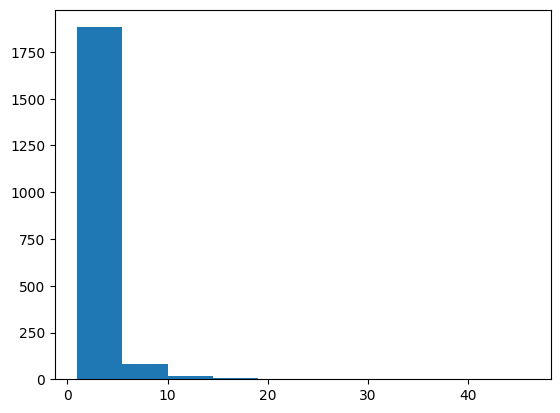

In [14]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ds = pd.read_csv("../data/lmsys-chat-lm.csv")
turn_list = ds['turn'].tolist()
x_turn = plt.hist(turn_list)
y, x = x_turn[0], x_turn[1]
for data_num, turn_num in zip(y, x):
    print(f"The number of turn {turn_num}: {data_num}")

In [ ]:
turn_list = ds['turn'].tolist()
conv_list = ds['conversation'].tolist()
print(len(conv_list))

prompt_length = []
for i, conv in enumerate(conv_list):
    turn_num = turn_list[i]
    print(conv.replace("[", "\"").replace("]", "\""))
    conv = conv.split("}").join(",")
    for t in range(turn_num):
        if conv[t]['role'] == "user":
            prompt_length.append(len(conv[t]['content']))
x_length = plt.hist(prompt_length)

2000
"{'content': "the table structure is: create table classroom\n (building varchar(15) comment '楼宇',\n room_number varchar(7) comment '教室编号',\n capacity numeric(4,0) comment '容量',\n primary key (building, room_number)\n ) comment='教室信息';\n;the question is: Find the buildings which have rooms with capacity more than 50.convert to sql according to the table structure and question prompt", 'role': 'user'}
 {'content': 'SELECT building\nFROM classroom\nWHERE capacity > 50;', 'role': 'assistant'}
 {'content': "the table structure is: create table classroom\\n (building varchar(15) comment '楼宇',\\n room_number varchar(7) comment '教室编号',\\n capacity numeric(4,0) comment '容量',\\n primary key (building, room_number)\\n ) comment='教室信息';\\n;the question is: How many classrooms are not in NAME_1?convert to sql according to the table structure and question prompt", 'role': 'user'}
 {'content': "I'm sorry, but the table structure and question prompt do not contain any information about NAME_1. T

JSONDecodeError: Extra data: line 1 column 15 (char 14)